In [50]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [51]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [52]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [53]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [54]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

/var/folders/q8/t_k5gtj11z5dpr8r51m6nbz00000gn/T/ipykernel_32979/4196587217.py:4: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect=True)


In [55]:
# View all of the classes that automap found
for classes in Base.classes:
    print(classes.__name__)


station
measurement


In [56]:
# Save references to each table
station = Base.classes.station
measurment = Base.classes.measurement

In [57]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [58]:
# Find the most recent date in the data set.
recentDateQuery = session.query(func.max(measurment.date)).first()
print(recentDateQuery)

('2017-08-23',)


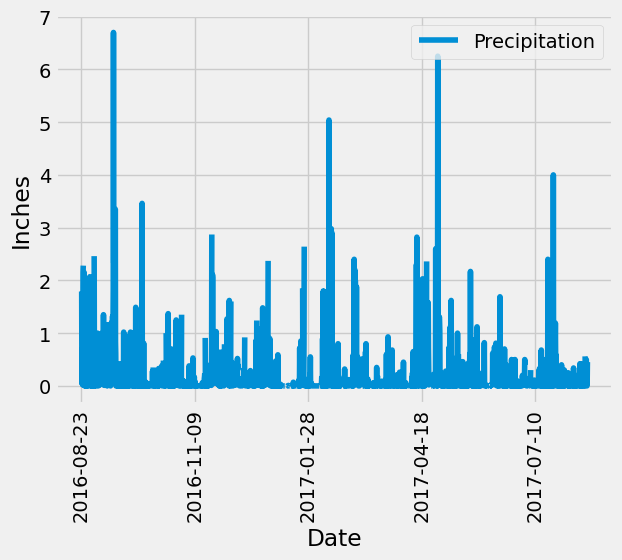

In [59]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
lastYear = dt.date(2017, 8, 23) - dt.timedelta(days=365)
lastYear

# Perform a query to retrieve the data and precipitation scores
precipitation = session.query(measurment.date, measurment.prcp).filter(measurment.date >= lastYear).all()
precipitation
# Save the query results as a Pandas DataFrame. Explicitly set the column names
results = pd.DataFrame(precipitation, columns=["Date", 'Measurment'])


# Sort the dataframe by date
sorted = results.sort_values(by="Date", ascending=True)

# Use Pandas Plotting with Matplotlib to plot the data
sorted.plot("Date", "Measurment", xlabel="Date", ylabel="Inches")
plt.xticks(rotation=90)
plt.legend(['Precipitation'], loc='upper right')


In [60]:
# Use Pandas to calculate the summary statistics for the precipitation data
results.describe()

,Measurment
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [61]:
# Design a query to calculate the total number of stations in the dataset
stationNum = session.query(func.count(station.station)).all()
print(stationNum)
print(session.query(station.station))

[(9,)]
SELECT station.station AS station_station 
FROM station


In [62]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
obsCount = session.query(measurment.station, func.count(measurment.station)).group_by(measurment.station).order_by(func.count(measurment.station).desc()).all()
print(obsCount)

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [63]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
active = session.query(func.min(measurment.tobs), func.max(measurment.tobs), func.avg(measurment.tobs)).filter(measurment.station == 'USC00519281').all()
print(active)


[(54.0, 85.0, 71.66378066378067)]


Text(0.5, 1.0, '')

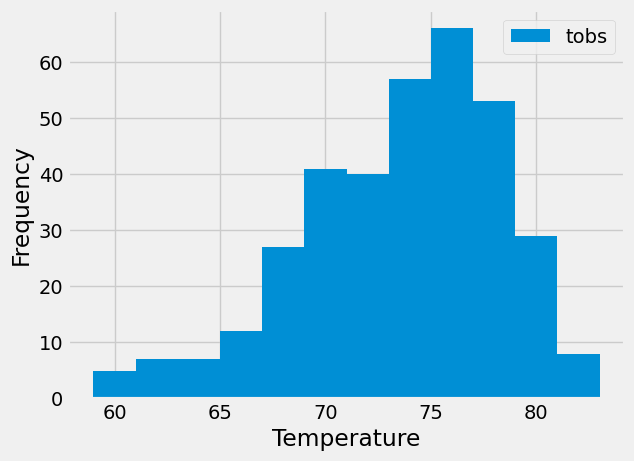

In [64]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
active12 = session.query(measurment.tobs).filter(measurment.station == 'USC00519281', measurment.date >= lastYear).all()
active12
temps = pd.DataFrame(active12)
histogram = temps.hist(bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend(['tobs'], loc='upper right')
plt.title(None)


# Close Session

In [65]:
# Close Session
session.close()